In [1]:
import pandas as pd

In [497]:
# We have removed the first unneeded header manually before we start to make things easier
# Now we start to import the excel sheet to a pandas dataFrame

data = pd.read_excel (r'./default_data.xls')



In [74]:
data.shape

(30000, 25)

We have 30,000 rows and 25 columns

In [42]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   29669 non-null  object
 4   MARRIAGE                    29677 non-null  object
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

ID: User ID <br>
LIMIT_BAL: Amount of the given credit<br>
SEX: Gender (male; female)<br>
EDUCATION: Education (graduate school; university; high school; others)<br>
MARRIAGE: Marital status (married; single; others)<br>
AGE: Age (years)<br>
PAY_0-PAY_6: History of past payments. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months… 8 = payment delay for eight months; 9 =payment delay for nine months and above.<br>
BILL_AMT1-BILL_AMT6: Amount of bill statement<br>
PAY_AMT1-PAY_AMT6: Amount of previous payment<br>
default payment next month: Did the person default? (Yes = 1, No = 0)



Let's check the unique values of our target column

In [498]:
data.rename(columns={'default payment next month':'default'}, inplace=True)
data.default.unique()

array([1, 0], dtype=int64)

Our Target is a binary so we should use a binary classification algorithm for our model

Let' see the frequency of each feature and count their unique values

In [45]:
for column in data.columns:
    display(pd.crosstab(index=data[column],
                        columns='% observations', 
                        normalize='columns'))
    print("# of unique values {}".format(data[column].nunique()))


col_0,% observations
ID,
1,0.000033
2,0.000033
3,0.000033
4,0.000033
5,0.000033
...,...
29996,0.000033
29997,0.000033
29998,0.000033


# of unique values 30000


col_0,% observations
LIMIT_BAL,
10000,0.016433
16000,0.000067
20000,0.065867
30000,0.053667
40000,0.007667
...,...
750000,0.000133
760000,0.000033
780000,0.000067


# of unique values 81


col_0,% observations
SEX,
female,0.603733
male,0.396267


# of unique values 2


col_0,% observations
EDUCATION,
0,0.000472
graduate school,0.356770
high school,0.165695
others,0.004179
university,0.472884


# of unique values 5


col_0,% observations
MARRIAGE,
0,0.001820
married,0.460255
single,0.537925


# of unique values 3


col_0,% observations
AGE,
21,0.002233
22,0.018667
23,0.031033
24,0.037567
25,0.039533
...,...
149,0.000033
152,0.000033
228,0.000033


# of unique values 63


col_0,% observations
PAY_0,
-2,0.091967
-1,0.189533
0,0.491233
1,0.122933
2,0.088900
3,0.010733
4,0.002533
5,0.000867
6,0.000367


# of unique values 11


col_0,% observations
PAY_2,
-2,0.126067
-1,0.201667
0,0.524333
1,0.000933
2,0.130900
3,0.010867
4,0.003300
5,0.000833
6,0.000400


# of unique values 11


col_0,% observations
PAY_3,
-2,0.136167
-1,0.197933
0,0.525467
1,0.000133
2,0.127300
3,0.008000
4,0.002533
5,0.000700
6,0.000767


# of unique values 11


col_0,% observations
PAY_4,
-2,0.144933
-1,0.189567
0,0.548500
1,0.000067
2,0.105300
3,0.006000
4,0.002300
5,0.001167
6,0.000167


# of unique values 11


col_0,% observations
PAY_5,
-2,0.151533
-1,0.184633
0,0.564900
2,0.087533
3,0.005933
4,0.002800
5,0.000567
6,0.000133
7,0.001933


# of unique values 10


col_0,% observations
PAY_6,
-2,0.163167
-1,0.191333
0,0.542867
2,0.092200
3,0.006133
4,0.001633
5,0.000433
6,0.000633
7,0.001533


# of unique values 10


col_0,% observations
BILL_AMT1,
-165580,0.000033
-154973,0.000033
-15308,0.000033
-14386,0.000033
-11545,0.000033
...,...
626648,0.000033
630458,0.000033
653062,0.000033


# of unique values 22723


col_0,% observations
BILL_AMT2,
-69777,0.000033
-67526,0.000033
-33350,0.000033
-30000,0.000033
-26214,0.000033
...,...
624475,0.000033
646770,0.000033
671563,0.000033


# of unique values 22346


col_0,% observations
BILL_AMT3,
-157264,0.000033
-61506,0.000033
-46127,0.000033
-34041,0.000033
-25443,0.000033
...,...
689627,0.000033
689643,0.000033
693131,0.000033


# of unique values 22026


col_0,% observations
BILL_AMT4,
-170000,0.000033
-81334,0.000033
-65167,0.000033
-50616,0.000033
-46627,0.000033
...,...
572805,0.000033
616836,0.000033
628699,0.000033


# of unique values 21548


col_0,% observations
BILL_AMT5,
-81334,0.000033
-61372,0.000033
-53007,0.000033
-46627,0.000033
-37594,0.000033
...,...
547880,0.000033
551702,0.000033
587067,0.000033


# of unique values 21010


col_0,% observations
BILL_AMT6,
-339603,0.000033
-209051,0.000033
-150953,0.000033
-94625,0.000033
-73895,0.000033
...,...
527566,0.000033
527711,0.000033
568638,0.000033


# of unique values 20604


col_0,% observations
PAY_AMT1,
0,0.174967
1,0.000300
2,0.000467
3,0.000500
4,0.000600
...,...
405016,0.000033
423903,0.000033
493358,0.000033


# of unique values 7943


col_0,% observations
PAY_AMT2,
0,0.179867
1,0.000500
2,0.000667
3,0.000600
4,0.000367
...,...
580464,0.000033
1024516,0.000033
1215471,0.000033


# of unique values 7899


col_0,% observations
PAY_AMT3,
0,0.198933
1,0.000433
2,0.000633
3,0.000467
4,0.000500
...,...
400972,0.000033
417588,0.000033
508229,0.000033


# of unique values 7518


col_0,% observations
PAY_AMT4,
0,0.213600
1,0.000733
2,0.000733
3,0.000433
4,0.000667
...,...
400046,0.000033
432130,0.000033
497000,0.000033


# of unique values 6937


col_0,% observations
PAY_AMT5,
0,0.223433
1,0.000700
2,0.000433
3,0.000433
4,0.000400
...,...
332000,0.000033
379267,0.000033
388071,0.000033


# of unique values 6897


col_0,% observations
PAY_AMT6,
0,0.239100
1,0.000667
2,0.000300
3,0.000467
4,0.000400
...,...
403500,0.000033
422000,0.000033
443001,0.000033


# of unique values 6939


col_0,% observations
default,
0,0.7788
1,0.2212


# of unique values 2


<u>Our Observations</u><br>
- 60% of the users are female <br>
- Some Pay values are with -2 not in the expected range of values (-1 to 9)
- We have some outliers with categorial values of 0 in both EDUCATION and MARRIAGE
- The data is unballanced with 22% of the cusotmer defaluted. However, this is expected in the usecase as we wouldn't expected 50% of the cusotmers to default. We will deal with the unbalanced data later using stratified Crossvalidation.


Now let's look at how our features relate to our target

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
# # Relation with numerical features
for column in data.select_dtypes(exclude=['object']).columns:
    if column != 'default':
        display(pd.crosstab(index=data[column], columns=data['default'], normalize='columns'))


default,0,1
ID,,
1,0.000000,0.000151
2,0.000000,0.000151
3,0.000043,0.000000
4,0.000043,0.000000
5,0.000043,0.000000
...,...,...
29996,0.000043,0.000000
29997,0.000043,0.000000
29998,0.000000,0.000151


default,0,1
LIMIT_BAL,,
10000,0.012669,0.029687
16000,0.000086,0.000000
20000,0.054700,0.105184
30000,0.044599,0.085594
40000,0.005907,0.013864
...,...,...
750000,0.000171,0.000000
760000,0.000043,0.000000
780000,0.000086,0.000000


default,0,1
AGE,,
21,0.002268,0.002110
22,0.016735,0.025467
23,0.029276,0.037221
24,0.035396,0.045208
25,0.037836,0.045509
...,...,...
149,0.000043,0.000000
152,0.000043,0.000000
228,0.000043,0.000000


default,0,1
PAY_0,,
-2,0.102465,0.055003
-1,0.202534,0.143761
0,0.549949,0.284509
1,0.104263,0.188668
2,0.035225,0.277878
3,0.003338,0.036769
4,0.001027,0.007836
5,0.000556,0.001959
6,0.000214,0.000904


default,0,1
PAY_2,,
-2,0.132298,0.104129
-1,0.217600,0.145570
0,0.566127,0.377185
1,0.000984,0.000753
2,0.074602,0.329114
3,0.005350,0.030289
4,0.002097,0.007535
5,0.000428,0.002260
6,0.000128,0.001356


default,0,1
PAY_3,,
-2,0.142441,0.114075
-1,0.214518,0.139542
0,0.556968,0.414557
1,0.000128,0.000151
2,0.079182,0.296715
3,0.004366,0.020796
4,0.001370,0.006631
5,0.000385,0.001808
6,0.000385,0.002110


default,0,1
PAY_4,,
-2,0.150274,0.126130
-1,0.204717,0.136227
0,0.575201,0.454491
1,0.000043,0.000151
2,0.064458,0.249096
3,0.002996,0.016576
4,0.000984,0.006932
5,0.000728,0.002712
6,0.000128,0.000301


default,0,1
PAY_5,,
-2,0.156266,0.134870
-1,0.198682,0.135172
0,0.588598,0.481465
2,0.051489,0.214436
3,0.002782,0.017028
4,0.001412,0.007685
5,0.000300,0.001507
6,0.000043,0.000452
7,0.000428,0.007233


default,0,1
PAY_6,,
-2,0.167523,0.147830
-1,0.203946,0.146926
0,0.565699,0.462477
2,0.058423,0.211121
3,0.002825,0.017782
4,0.000770,0.004671
5,0.000257,0.001055
6,0.000214,0.002110
7,0.000342,0.005726


default,0,1
BILL_AMT1,,
-165580,0.000043,0.0
-154973,0.000043,0.0
-15308,0.000043,0.0
-14386,0.000043,0.0
-11545,0.000043,0.0
...,...,...
626648,0.000043,0.0
630458,0.000043,0.0
653062,0.000043,0.0


default,0,1
BILL_AMT2,,
-69777,0.000043,0.0
-67526,0.000043,0.0
-33350,0.000043,0.0
-30000,0.000043,0.0
-26214,0.000043,0.0
...,...,...
624475,0.000043,0.0
646770,0.000043,0.0
671563,0.000043,0.0


default,0,1
BILL_AMT3,,
-157264,0.000043,0.000000
-61506,0.000000,0.000151
-46127,0.000000,0.000151
-34041,0.000043,0.000000
-25443,0.000000,0.000151
...,...,...
689627,0.000043,0.000000
689643,0.000043,0.000000
693131,0.000043,0.000000


default,0,1
BILL_AMT4,,
-170000,0.000043,0.000000
-81334,0.000043,0.000000
-65167,0.000000,0.000151
-50616,0.000000,0.000151
-46627,0.000000,0.000151
...,...,...
572805,0.000043,0.000000
616836,0.000043,0.000000
628699,0.000043,0.000000


default,0,1
BILL_AMT5,,
-81334,0.000043,0.000000
-61372,0.000043,0.000000
-53007,0.000000,0.000151
-46627,0.000000,0.000151
-37594,0.000043,0.000000
...,...,...
547880,0.000000,0.000151
551702,0.000043,0.000000
587067,0.000043,0.000000


default,0,1
BILL_AMT6,,
-339603,0.000000,0.000151
-209051,0.000043,0.000000
-150953,0.000043,0.000000
-94625,0.000000,0.000151
-73895,0.000043,0.000000
...,...,...
527566,0.000043,0.000000
527711,0.000043,0.000000
568638,0.000043,0.000000


default,0,1
PAY_AMT1,,
0,0.143897,0.284358
1,0.000214,0.000603
2,0.000385,0.000753
3,0.000471,0.000603
4,0.000471,0.001055
...,...,...
405016,0.000043,0.000000
423903,0.000043,0.000000
493358,0.000043,0.000000


default,0,1
PAY_AMT2,,
0,0.153955,0.271097
1,0.000385,0.000904
2,0.000642,0.000753
3,0.000556,0.000753
4,0.000342,0.000452
...,...,...
580464,0.000043,0.000000
1024516,0.000043,0.000000
1215471,0.000043,0.000000


default,0,1
PAY_AMT3,,
0,0.172787,0.290989
1,0.000385,0.000603
2,0.000642,0.000603
3,0.000556,0.000151
4,0.000471,0.000603
...,...,...
400972,0.000043,0.000000
417588,0.000043,0.000000
508229,0.000000,0.000151


default,0,1
PAY_AMT4,,
0,0.188966,0.300332
1,0.000728,0.000753
2,0.000856,0.000301
3,0.000385,0.000603
4,0.000599,0.000904
...,...,...
400046,0.000043,0.000000
432130,0.000000,0.000151
497000,0.000043,0.000000


default,0,1
PAY_AMT5,,
0,0.202577,0.296866
1,0.000728,0.000603
2,0.000428,0.000452
3,0.000471,0.000301
4,0.000342,0.000603
...,...,...
332000,0.000000,0.000151
379267,0.000043,0.000000
388071,0.000043,0.000000


default,0,1
PAY_AMT6,,
0,0.218071,0.313140
1,0.000471,0.001356
2,0.000300,0.000301
3,0.000514,0.000301
4,0.000514,0.000000
...,...,...
403500,0.000043,0.000000
422000,0.000043,0.000000
443001,0.000043,0.000000


We've noticed that after 2 months of delay the customer's precent to defalut increases

ID


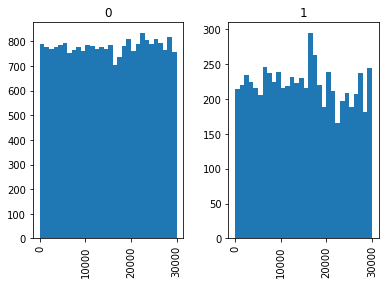

LIMIT_BAL


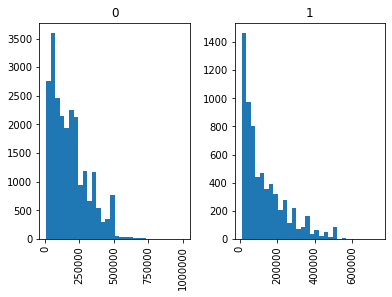

AGE


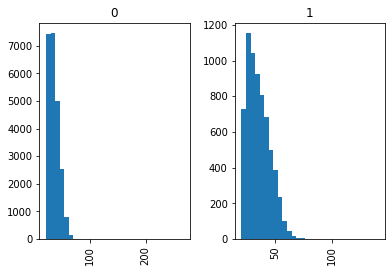

PAY_0


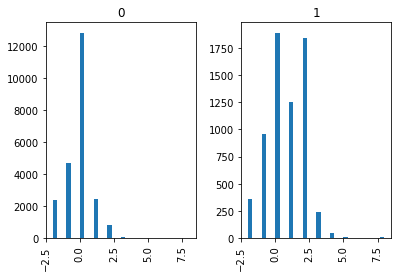

PAY_2


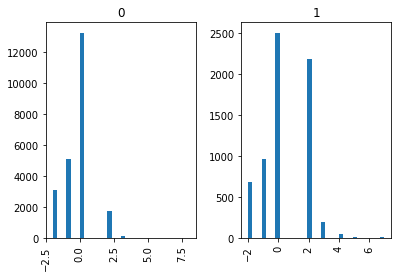

PAY_3


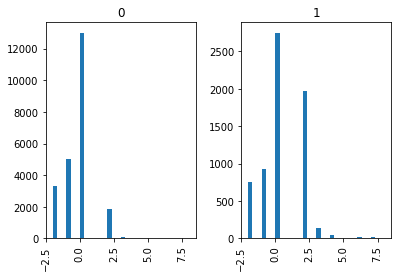

PAY_4


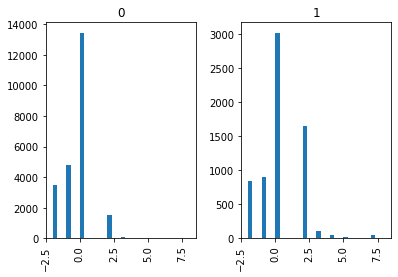

PAY_5


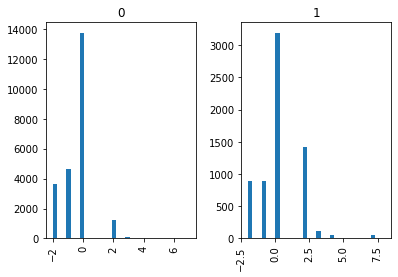

PAY_6


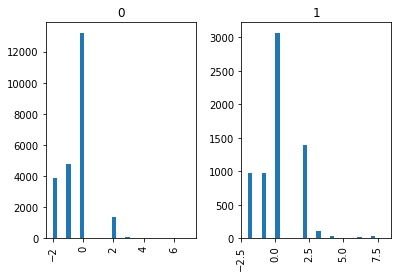

BILL_AMT1


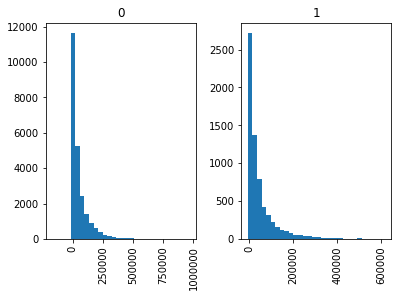

BILL_AMT2


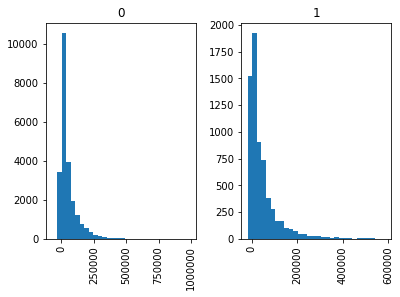

BILL_AMT3


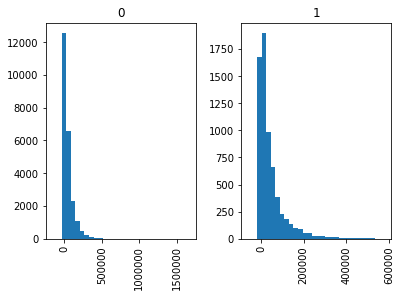

BILL_AMT4


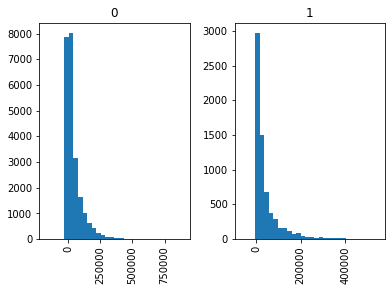

BILL_AMT5


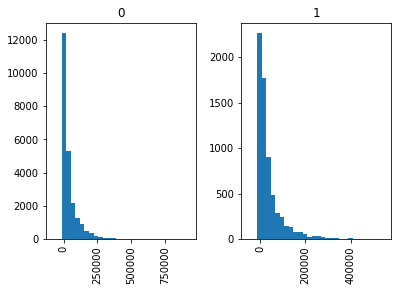

BILL_AMT6


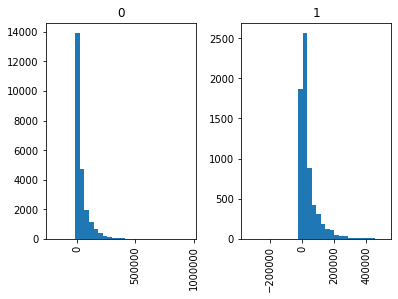

PAY_AMT1


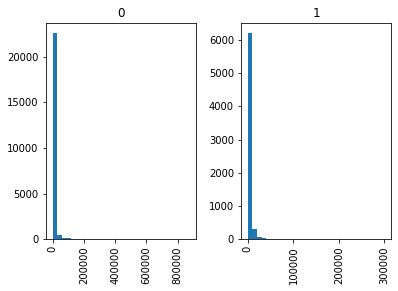

PAY_AMT2


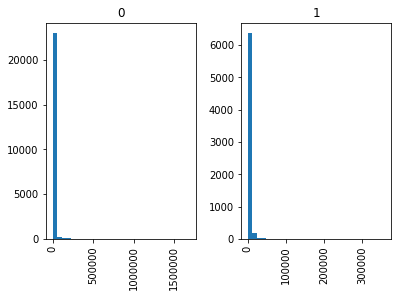

PAY_AMT3


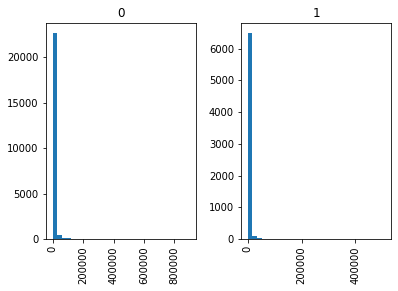

PAY_AMT4


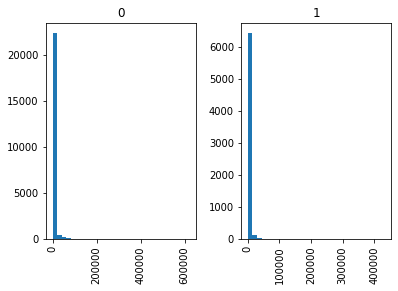

PAY_AMT5


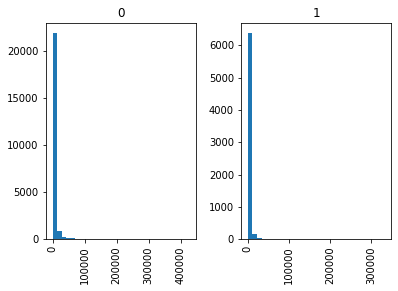

PAY_AMT6


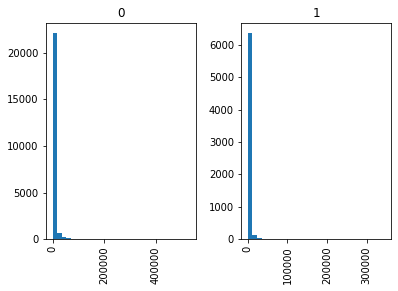

In [499]:
# Relation with categirical features
for column in data.drop(columns = ['default']).select_dtypes(exclude=['object']).columns:
    print(column)
    hist = data[[column, 'default']].hist(by='default', bins=30, sharey=False,column=column)
    plt.show()

Several data is not normally distributed and this is normal in our case

In [220]:
# Show summary statistics
# Numerical features
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

display(data.describe())


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,35.513130,-0.016203,-0.133235,-0.165776,-0.220099,-0.265569,-0.290358,51297.386109,4.707703e+04,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,129821.209970,9.529834,1.123450,1.196990,1.196386,1.168849,1.133057,1.149735,73694.489286,6.940473e+04,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-1.572640e+05,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.000000,2.685500e+03,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22420.500000,2.011150e+04,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67283.500000,6.025250e+04,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,1.664089e+06,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


- There are some outliers in columns like AGE as its impossible to have someone 267 old
- There are some  outliers in columns PAY_0 to PAY_6 as our value ranges should be from -1 to 9 as per the descriptions for the columns where -1 means the customer is pay duly and 1 to 9 represents the number of delayed months

In [65]:
# Categorial features
display(data.describe(include=np.object))


,SEX,EDUCATION,MARRIAGE
count,30000,29669,29677
unique,2,5,3
top,female,university,single
freq,18112,14030,15964


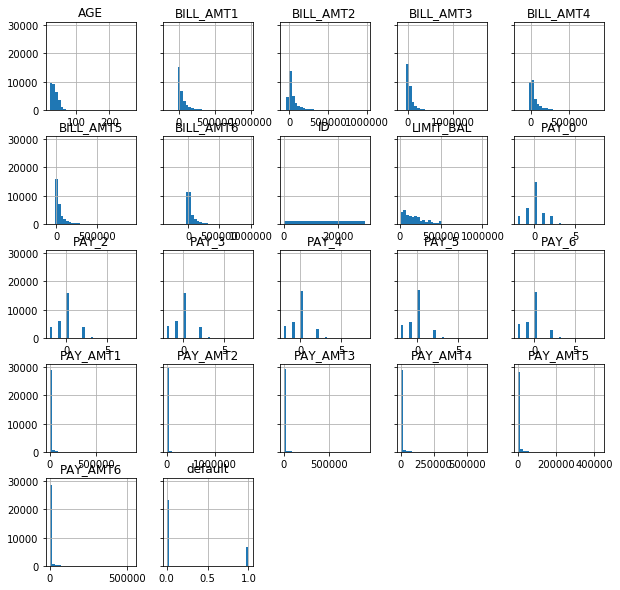

In [69]:
# Histograms for each numeric feature
hist = data.hist(bins=30, sharey=True, figsize=(10, 10))


<Br><b>Data Cleansing

In [73]:
data.shape

(30000, 25)

We have previously observed that EDUCATION has 0.000472 with zero value
ALso, MARRIAGE has 0.001820 with zero
As these are small percentages its ok to delete their rows

In [84]:
data['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4916
others               124
0                     14
Name: EDUCATION, dtype: int64

In [85]:
data['MARRIAGE'].value_counts()

single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64

In [174]:
data.drop(data.index[data['EDUCATION'] == 0], inplace = True)

In [175]:
data.shape

(29986, 25)

In [176]:
data.drop(data.index[data['MARRIAGE'] == 0], inplace = True)

In [177]:
data.shape

(29932, 25)

In [178]:
# Let's check the null values in the dataset
data.isnull().sum()

ID             0
LIMIT_BAL      0
SEX            0
EDUCATION    331
MARRIAGE     323
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
default        0
dtype: int64

We have 331 in the EDUCATION and 323 in the MARRIAGE column, we better impute these columns as the numbers are not very few as for the zeros

In [151]:
data[data.EDUCATION.isnull()]



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
47,48,150000,female,NaN,single,46,0,0,-1,0,...,1170,0,0,1013,1170,0,0,0,0,1
69,70,20000,male,NaN,single,22,2,0,0,0,...,18085,11205,5982,0,1200,1000,500,1000,0,0
385,386,410000,female,NaN,married,42,0,0,0,0,...,240865,234939,240176,15000,14000,9000,8500,9000,8300,0
502,503,230000,female,NaN,single,46,0,0,0,0,...,186635,189896,193351,10000,9000,8000,8000,7500,7000,0
504,505,30000,male,NaN,married,53,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29811,29812,50000,male,NaN,single,46,0,0,0,-1,...,19183,19563,19157,1423,1000,19183,687,696,776,0
29836,29837,180000,male,NaN,married,34,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29839,29840,150000,male,NaN,married,36,0,0,0,0,...,136378,139219,142172,5500,3800,3900,4000,4100,4100,0
29920,29921,50000,male,NaN,married,45,2,0,0,0,...,50947,51020,0,3000,3428,2002,1023,0,0,1


In [179]:
data[data['MARRIAGE'].isnull()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
15,16,50000,female,high school,NaN,23,1,2,0,0,...,28771,29531,30211,0,1500,1100,1200,1300,1100,0
51,52,100000,female,high school,NaN,43,0,0,0,0,...,39619,35762,33258,2000,1606,1500,2000,1500,1000,0
80,81,470000,female,high school,NaN,33,0,0,0,0,...,69923,29271,29889,6400,7566,3000,960,1000,3000,0
239,240,140000,female,university,NaN,41,0,0,0,0,...,19068,16409,16383,3000,2000,2198,1000,3000,2399,1
373,374,30000,male,high school,NaN,54,0,0,0,0,...,23221,24339,25943,2500,2000,1500,4000,2000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29282,29283,80000,female,graduate school,NaN,25,0,-1,-1,-1,...,478,219,0,1136,727,478,219,0,0,0
29509,29510,200000,male,university,NaN,41,0,0,0,2,...,116278,128087,125931,3864,14269,0,13808,0,4600,0
29612,29613,20000,male,university,NaN,47,-1,-1,2,2,...,0,780,0,780,0,0,780,0,0,1
29745,29746,20000,male,university,NaN,40,0,0,0,-1,...,20000,0,780,1500,1000,20000,0,390,0,0


In [180]:
#import numpy as np
# Imputing with most frequent / mode value

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy="most_frequent")


data.EDUCATION = imp.fit_transform(data['EDUCATION'].values.reshape(-1,1))[:,0]
data.MARRIAGE = imp.fit_transform(data['MARRIAGE'].values.reshape(-1,1))[:,0]


#data= imp.fit_transform(data)



In [181]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

In [167]:
data['EDUCATION'].value_counts()

university         14355
graduate school    10581
high school         4872
others               124
Name: EDUCATION, dtype: int64

In [184]:
data['MARRIAGE'].value_counts()

single     16277
married    13655
Name: MARRIAGE, dtype: int64

Drop the unneeded columns

In [182]:
data = data.drop(['ID'], axis=1)

In [183]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Remove the outliers like that in AGE <br>
Onehot encoding<br>
Correlation<br>

Text(0.5, 1, 'dataset correlation')

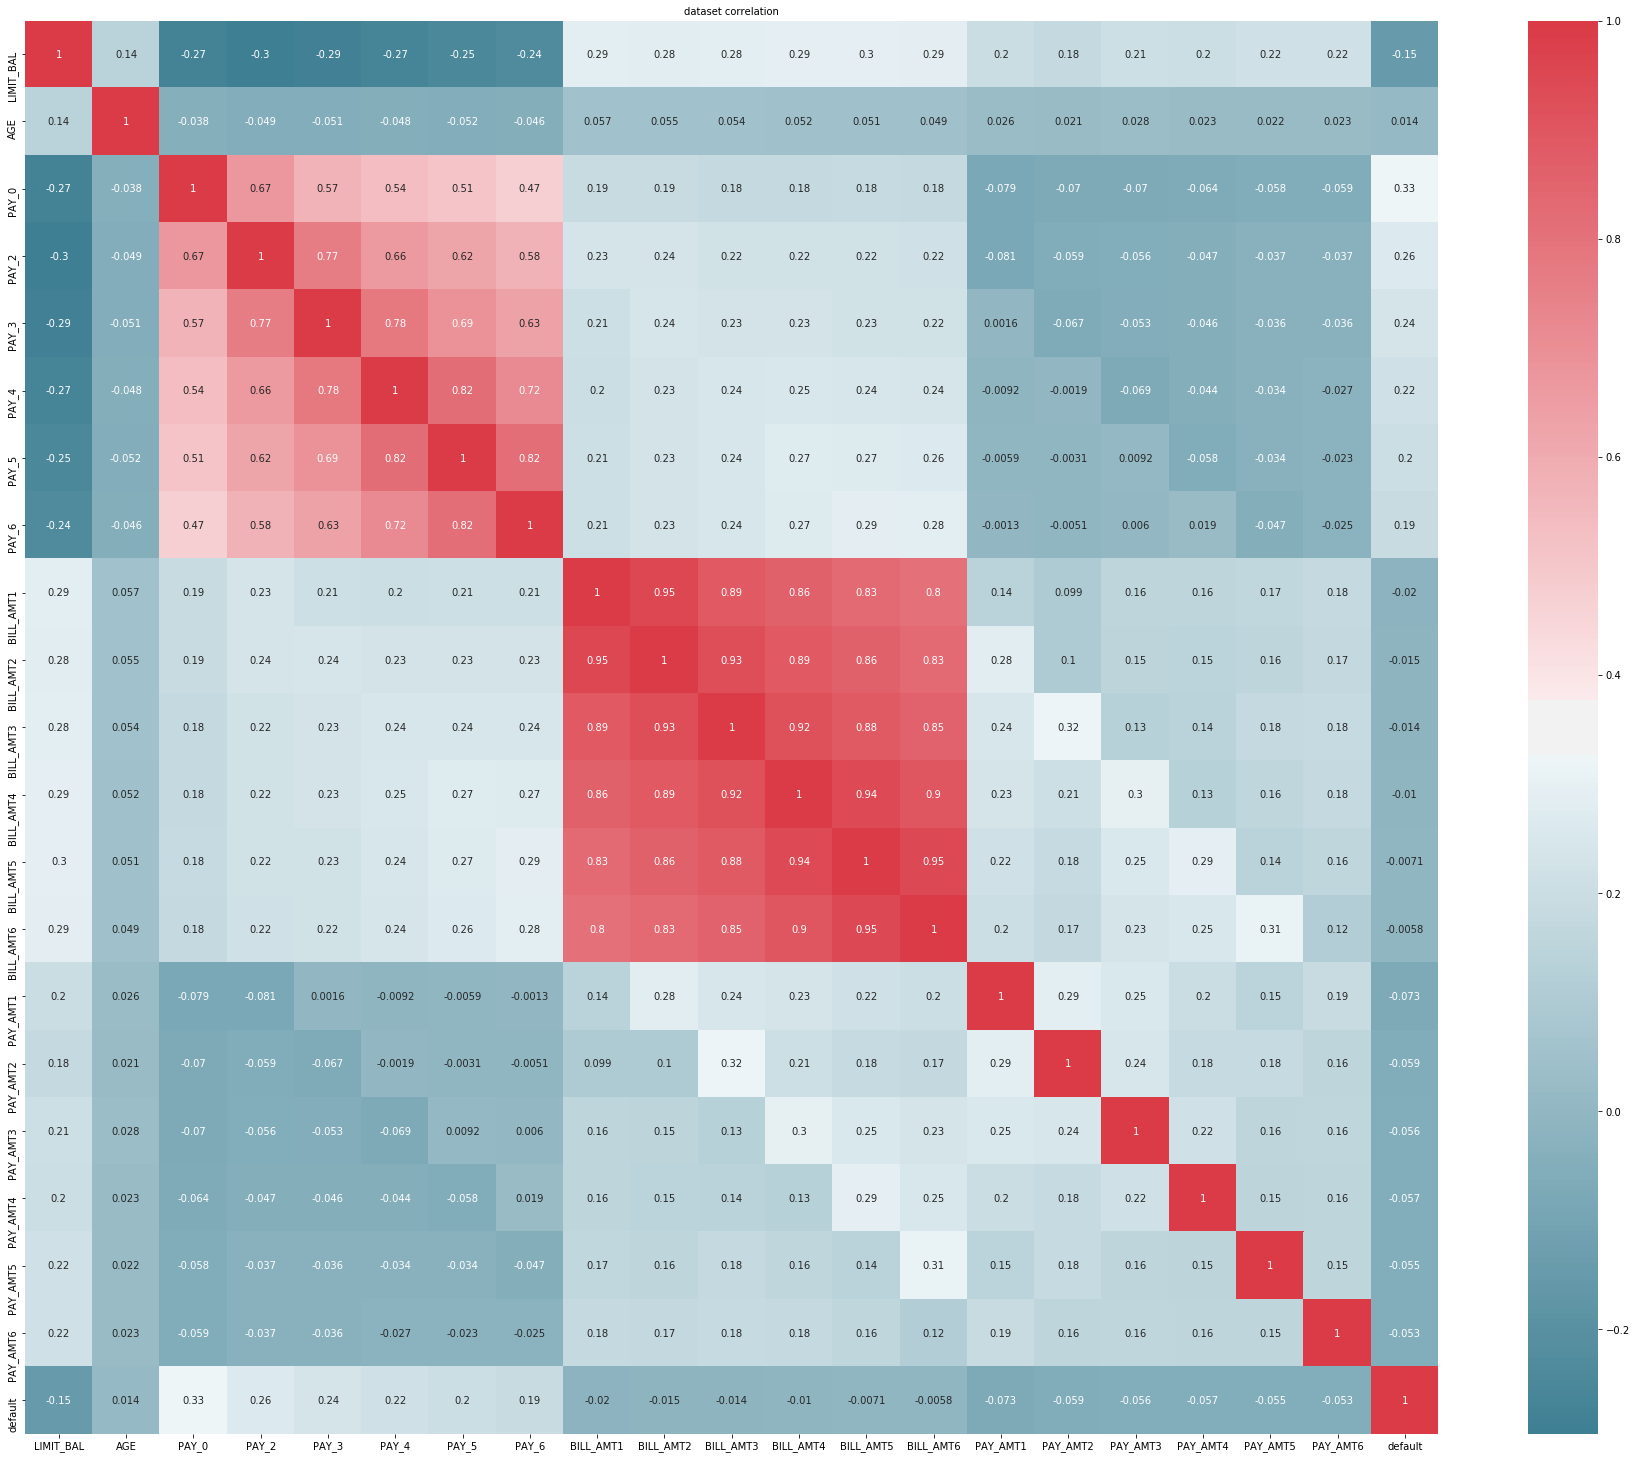

In [193]:
# Display correlation after removing correlated features
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = data.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [190]:
display(data.corr())


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
LIMIT_BAL,1.000000,0.141929,-0.271175,-0.296197,-0.285901,-0.267423,-0.249376,-0.235049,0.285684,0.278518,...,0.294143,0.295752,0.290608,0.195311,0.178245,0.210059,0.203216,0.217263,0.219702,-0.153718
AGE,0.141929,1.000000,-0.038097,-0.048841,-0.051451,-0.048028,-0.052066,-0.046457,0.057082,0.055390,...,0.051894,0.050552,0.048857,0.026441,0.020981,0.028472,0.022775,0.022102,0.022504,0.013578
PAY_0,-0.271175,-0.038097,1.000000,0.671786,0.574044,0.538658,0.509189,0.474333,0.186984,0.189819,...,0.179124,0.180585,0.176918,-0.079247,-0.070179,-0.070401,-0.064118,-0.058334,-0.058760,0.325143
PAY_2,-0.296197,-0.048841,0.671786,1.000000,0.766579,0.661977,0.622452,0.575069,0.234766,0.235202,...,0.222157,0.221221,0.219242,-0.080645,-0.058915,-0.055730,-0.046910,-0.037289,-0.036592,0.263634
PAY_3,-0.285901,-0.051451,0.574044,0.766579,1.000000,0.777365,0.686855,0.632710,0.208477,0.237406,...,0.227265,0.225174,0.222305,0.001604,-0.066714,-0.053120,-0.046074,-0.036075,-0.035904,0.235240
PAY_4,-0.267423,-0.048028,0.538658,0.661977,0.777365,1.000000,0.820045,0.716603,0.202723,0.225803,...,0.245875,0.242794,0.239027,-0.009224,-0.001870,-0.069153,-0.043606,-0.033794,-0.026643,0.216707
PAY_5,-0.249376,-0.052066,0.509189,0.622452,0.686855,0.820045,1.000000,0.816688,0.206536,0.226827,...,0.271793,0.269594,0.262293,-0.005934,-0.003147,0.009181,-0.058478,-0.033549,-0.023138,0.204275
PAY_6,-0.235049,-0.046457,0.474333,0.575069,0.632710,0.716603,0.816688,1.000000,0.207191,0.226811,...,0.266222,0.290716,0.284873,-0.001313,-0.005093,0.005995,0.018935,-0.046682,-0.025425,0.186854
BILL_AMT1,0.285684,0.057082,0.186984,0.234766,0.208477,0.202723,0.206536,0.207191,1.000000,0.951531,...,0.860262,0.829772,0.802635,0.140656,0.099409,0.156966,0.158258,0.166893,0.179218,-0.020027
BILL_AMT2,0.278518,0.055390,0.189819,0.235202,0.237406,0.225803,0.226827,0.226811,0.951531,1.000000,...,0.892473,0.859793,0.831612,0.280358,0.100870,0.150739,0.147333,0.157844,0.174139,-0.014517


In [199]:
# Create correlation matrix
corr_mat = data.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)


In [203]:
sorted_mat.head(50)

default    default      1.000000
BILL_AMT2  BILL_AMT2    1.000000
PAY_AMT4   PAY_AMT4     1.000000
PAY_AMT3   PAY_AMT3     1.000000
PAY_AMT2   PAY_AMT2     1.000000
PAY_AMT1   PAY_AMT1     1.000000
BILL_AMT6  BILL_AMT6    1.000000
BILL_AMT5  BILL_AMT5    1.000000
BILL_AMT4  BILL_AMT4    1.000000
BILL_AMT1  BILL_AMT1    1.000000
PAY_AMT6   PAY_AMT6     1.000000
PAY_6      PAY_6        1.000000
PAY_5      PAY_5        1.000000
PAY_4      PAY_4        1.000000
PAY_3      PAY_3        1.000000
PAY_2      PAY_2        1.000000
PAY_0      PAY_0        1.000000
AGE        AGE          1.000000
PAY_AMT5   PAY_AMT5     1.000000
BILL_AMT3  BILL_AMT3    1.000000
LIMIT_BAL  LIMIT_BAL    1.000000
BILL_AMT2  BILL_AMT1    0.951531
BILL_AMT1  BILL_AMT2    0.951531
BILL_AMT6  BILL_AMT5    0.946171
BILL_AMT5  BILL_AMT6    0.946171
BILL_AMT4  BILL_AMT5    0.940120
BILL_AMT5  BILL_AMT4    0.940120
BILL_AMT3  BILL_AMT2    0.928343
BILL_AMT2  BILL_AMT3    0.928343
BILL_AMT4  BILL_AMT3    0.923959
BILL_AMT3 

As we can see there are several highly correlated features with over 90% correlation we should remove them to avoid overfitting 

In [215]:
data = data.drop(['BILL_AMT2','BILL_AMT4','BILL_AMT5'], axis = 1)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29932 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29932 non-null  int64 
 1   SEX        29932 non-null  object
 2   EDUCATION  29932 non-null  object
 3   MARRIAGE   29932 non-null  object
 4   AGE        29932 non-null  int64 
 5   PAY_0      29932 non-null  int64 
 6   PAY_2      29932 non-null  int64 
 7   PAY_3      29932 non-null  int64 
 8   PAY_4      29932 non-null  int64 
 9   PAY_5      29932 non-null  int64 
 10  PAY_6      29932 non-null  int64 
 11  BILL_AMT1  29932 non-null  int64 
 12  BILL_AMT3  29932 non-null  int64 
 13  BILL_AMT6  29932 non-null  int64 
 14  PAY_AMT1   29932 non-null  int64 
 15  PAY_AMT2   29932 non-null  int64 
 16  PAY_AMT3   29932 non-null  int64 
 17  PAY_AMT4   29932 non-null  int64 
 18  PAY_AMT5   29932 non-null  int64 
 19  PAY_AMT6   29932 non-null  int64 
 20  default    29932 non-null  i

In [217]:
# Create correlation matrix
corr_mat = data.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values(ascending=False)


In [218]:
sorted_mat.head(50)

default    default      1.000000
BILL_AMT1  BILL_AMT1    1.000000
PAY_AMT4   PAY_AMT4     1.000000
PAY_AMT3   PAY_AMT3     1.000000
PAY_AMT2   PAY_AMT2     1.000000
PAY_AMT1   PAY_AMT1     1.000000
BILL_AMT6  BILL_AMT6    1.000000
BILL_AMT3  BILL_AMT3    1.000000
PAY_6      PAY_6        1.000000
PAY_AMT6   PAY_AMT6     1.000000
PAY_5      PAY_5        1.000000
PAY_4      PAY_4        1.000000
PAY_3      PAY_3        1.000000
PAY_2      PAY_2        1.000000
PAY_0      PAY_0        1.000000
AGE        AGE          1.000000
PAY_AMT5   PAY_AMT5     1.000000
LIMIT_BAL  LIMIT_BAL    1.000000
BILL_AMT3  BILL_AMT1    0.892316
BILL_AMT1  BILL_AMT3    0.892316
BILL_AMT3  BILL_AMT6    0.853309
BILL_AMT6  BILL_AMT3    0.853309
PAY_5      PAY_4        0.820045
PAY_4      PAY_5        0.820045
PAY_5      PAY_6        0.816688
PAY_6      PAY_5        0.816688
BILL_AMT6  BILL_AMT1    0.802635
BILL_AMT1  BILL_AMT6    0.802635
PAY_3      PAY_4        0.777365
PAY_4      PAY_3        0.777365
PAY_3     

We have removed some of the features with more than 90% correlations

In [ ]:
#Use scatter plot & box plot, PCA, Onehot Encoding

In [223]:
data.describe()


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,35.513130,-0.016203,-0.133235,-0.165776,-0.220099,-0.265569,-0.290358,51297.386109,4.707703e+04,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,129821.209970,9.529834,1.123450,1.196990,1.196386,1.168849,1.133057,1.149735,73694.489286,6.940473e+04,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-1.572640e+05,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.000000,2.685500e+03,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22420.500000,2.011150e+04,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67283.500000,6.025250e+04,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,1.664089e+06,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


As previously discussed we have observed the below, now it's time to remove those outliers
- There are some outliers in columns like AGE as its impossible to have someone 267 old
- There are some  outliers in columns PAY_0 to PAY_6 as our value ranges should be from -1 to 9 as per the descriptions for the columns where -1 means the customer is pay duly and 1 to 9 represents the number of delayed months

In [230]:
data.sort_values(by= ['AGE'], axis=0, ascending=False, inplace=False)#.count_values()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
8940,200000,female,high school,married,267,0,0,0,0,0,0,188072,159513,147690,17014,15019,15000,15000,10000,10000,0
29496,80000,male,university,married,235,-1,-1,-1,-1,-1,0,1692,1130,41864,2702,1246,397,42860,7,118,0
7318,360000,female,graduate school,single,228,0,0,0,0,0,0,152072,153306,140336,5708,6059,5009,5021,5027,100017,0
5395,490000,female,university,married,152,-1,-1,-1,-1,-1,-1,2779,755,4341,22595,762,7000,0,4341,1061,0
4011,50000,male,university,single,149,0,0,0,0,0,0,47864,50396,9801,3473,2294,328,350,323,312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14103,50000,female,university,single,21,0,0,0,0,0,0,1211,7076,9887,2000,4000,2000,2000,1000,2000,0
12556,20000,female,university,married,21,1,-2,-1,-1,-2,-2,0,289,0,0,289,0,0,0,0,1
1471,20000,male,university,single,21,0,0,2,0,0,-2,19277,20200,0,5000,0,0,0,0,0,1
7183,20000,female,university,single,21,0,0,0,-2,-2,-2,13717,0,0,1005,0,0,0,0,0,0


let's count customers with Age above 100

In [238]:
Rem = data.loc[(data['AGE'] >= 100)]


In [240]:
Rem.shape

(7, 21)

We have only 7 records that can be considered as outliers in the AGE column, we can safely delete those datapoints

In [242]:
data.shape

(29932, 21)

In [241]:
data[data['AGE'] <= 100]


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,2,2682,2682,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,0,29239,13559,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,0,46990,49291,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,8617,35835,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,male,high school,married,39,0,0,0,0,0,0,188948,208365,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,male,high school,single,43,-1,-1,-1,-1,0,0,1683,3502,0,1837,3526,8998,129,0,0,0
29997,30000,male,university,single,37,4,3,2,-1,0,0,3565,2758,19357,0,0,22000,4200,2000,3100,1
29998,80000,male,high school,married,41,1,-1,0,0,0,-1,-1645,76304,48944,85900,3409,1178,1926,52964,1804,1


In [243]:
data= data[data['AGE'] <= 100]

In [244]:
data.shape

(29925, 21)

We will ignore the the cusotmers with PAY = -2 till we verify with the instructors that this would be an outlier

In [248]:
#data[data['PAY_2'] == -2]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
9,20000,male,high school,single,35,-2,-2,-2,-2,-1,-1,0,0,13912,0,0,0,13007,1122,0,0
18,360000,female,graduate school,married,49,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0
19,180000,female,graduate school,single,29,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0
23,450000,female,graduate school,married,40,-2,-2,-2,-2,-2,-2,5512,1473,0,19428,1473,560,0,0,1128,1
26,60000,male,graduate school,single,27,1,-2,-1,-1,-1,-1,-109,259,-189,0,1000,0,500,0,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29961,260000,male,graduate school,single,33,-2,-2,-2,-2,-2,-2,0,0,955,263,0,1368,101,955,0,0
29973,230000,male,university,married,35,1,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,1
29979,180000,male,graduate school,married,32,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0
29983,20000,male,university,married,44,-2,-2,-2,-2,-2,-2,1822,2712,1719,2890,2720,2890,9263,1824,1701,0


In [252]:
#data['BILL_AMT1'].plot.scatter(x='length',y='width')

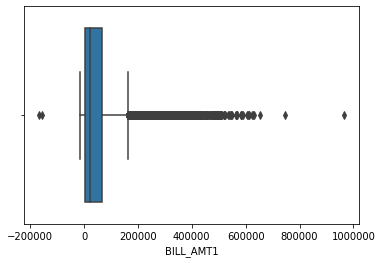

In [256]:
#import seaborn as sns
#sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(x=data["BILL_AMT1"])

As we are not working closely with the business we wouldn't be able to tell if these exceeding numbers are outliers or not we wouldn't risk it to remove them from the dataset

Now let's start on working on the categorial data

In [327]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29925 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  29925 non-null  int64 
 1   SEX        29925 non-null  object
 2   EDUCATION  29925 non-null  object
 3   MARRIAGE   29925 non-null  object
 4   AGE        29925 non-null  int64 
 5   PAY_0      29925 non-null  int64 
 6   PAY_2      29925 non-null  int64 
 7   PAY_3      29925 non-null  int64 
 8   PAY_4      29925 non-null  int64 
 9   PAY_5      29925 non-null  int64 
 10  PAY_6      29925 non-null  int64 
 11  BILL_AMT1  29925 non-null  int64 
 12  BILL_AMT3  29925 non-null  int64 
 13  BILL_AMT6  29925 non-null  int64 
 14  PAY_AMT1   29925 non-null  int64 
 15  PAY_AMT2   29925 non-null  int64 
 16  PAY_AMT3   29925 non-null  int64 
 17  PAY_AMT4   29925 non-null  int64 
 18  PAY_AMT5   29925 non-null  int64 
 19  PAY_AMT6   29925 non-null  int64 
 20  default    29925 non-null  i

The 3 categorial columns that we have are nominal

In [330]:
data.SEX.unique()

array(['female', 'male'], dtype=object)

In [333]:
data.MARRIAGE.unique()

array(['married', 'single'], dtype=object)

In [334]:
data.EDUCATION.unique()

array(['university', 'graduate school', 'others', 'high school'],
      dtype=object)

The columns SEX and MARRIAGE has only 2 unique values for each so we can use Label Encoding with them, as for the EDUCATION we can use Onehot Encoding


In [337]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['SEX'] = labelencoder.fit_transform(data['SEX'])
data['MARRIAGE'] = labelencoder.fit_transform(data['MARRIAGE'])



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [338]:
df = pd.get_dummies(data)

In [339]:
df.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,20000,0,0,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0,1,0,0,0,1
1,120000,0,1,26,-1,2,0,0,0,2,2682,2682,3261,0,1000,1000,1000,0,2000,1,0,0,0,1
2,90000,0,1,34,0,0,0,0,0,0,29239,13559,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,0,0,37,0,0,0,0,0,0,46990,49291,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,0,57,-1,0,-1,0,0,0,8617,35835,19131,2000,36681,10000,9000,689,679,0,0,0,0,1


In [340]:
df.isnull().sum()

LIMIT_BAL                    0
SEX                          0
MARRIAGE                     0
AGE                          0
PAY_0                        0
PAY_2                        0
PAY_3                        0
PAY_4                        0
PAY_5                        0
PAY_6                        0
BILL_AMT1                    0
BILL_AMT3                    0
BILL_AMT6                    0
PAY_AMT1                     0
PAY_AMT2                     0
PAY_AMT3                     0
PAY_AMT4                     0
PAY_AMT5                     0
PAY_AMT6                     0
default                      0
EDUCATION_graduate school    0
EDUCATION_high school        0
EDUCATION_others             0
EDUCATION_university         0
dtype: int64

In [346]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#scaler = preprocessing.MinMaxScaler()

#features = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT3','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','SEX','EDUCATION','MARRIAGE']


features = ['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT3','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','SEX','MARRIAGE','EDUCATION_graduate school','EDUCATION_high school','EDUCATION_others','EDUCATION_university']


x = df.reindex(columns = features).values
x = StandardScaler().fit_transform(x)

# Separating out the target
#y = df.reindex(columns ='default').values






In [347]:
x[:1]

array([[-1.13640132, -1.2453126 ,  1.79461872,  1.78199168, -0.69725287,
        -0.66719656, -1.53063243, -1.48682783, -0.64293373, -0.66830175,
        -0.6530469 , -0.34177688, -0.22698414, -0.296568  , -0.30795553,
        -0.31418124, -0.29340064, -0.81042783, -1.09185489, -0.73948048,
        -0.44087683, -0.0645053 ,  1.04166945]])

In [344]:
#pca = PCA(n_components=10)
#principalComponents = pca.fit_transform(x)

Let's start building our model

In [358]:
# We move the label to the last column to make it easier to work with
df = df[['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT3','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','SEX','MARRIAGE','EDUCATION_graduate school','EDUCATION_high school','EDUCATION_others','EDUCATION_university','default']]


In [357]:
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT3,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,MARRIAGE,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,default
0,20000,24,2,2,-1,-1,-2,-2,3913,689,0,0,689,0,0,0,0,0,0,0,0,0,1,1
1,120000,26,-1,2,0,0,0,2,2682,2682,3261,0,1000,1000,1000,0,2000,0,1,0,0,0,1,1
2,90000,34,0,0,0,0,0,0,29239,13559,15549,1518,1500,1000,1000,1000,5000,0,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,49291,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,1,0
4,50000,57,-1,0,-1,0,0,0,8617,35835,19131,2000,36681,10000,9000,689,679,1,0,0,0,0,1,0


In [352]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [359]:
# Get the feature values until the target column (not included)
X = df.values[:, :-1].astype(np.float32)

# Get the target column
y = df.values[:, -1].astype(np.float32)

# Get 80% of the data for training; the remaining 20% will be for validation and test
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size=0.2)

# Split the remaining 20% of data as 10% test and 10% validation
test_features, val_features, test_labels, val_labels = train_test_split(test_features, test_labels, test_size=0.5)

print(f"Length of train_features is: {train_features.shape}")
print(f"Length of train_labels is: {train_labels.shape}")
print(f"Length of val_features is: {val_features.shape}")
print(f"Length of val_labels is: {val_labels.shape}")
print(f"Length of test_features is: {test_features.shape}")
print(f"Length of test_labels is: {test_labels.shape}")


Length of train_features is: (23940, 23)
Length of train_labels is: (23940,)
Length of val_features is: (2993, 23)
Length of val_labels is: (2993,)
Length of test_features is: (2992, 23)
Length of test_labels is: (2992,)


In [360]:
model = XGBClassifier()
model.fit(train_features, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [362]:
#print(model)

In [363]:
y_pred = model.predict(test_features)
predictions = [round(value) for value in y_pred]

In [367]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


In [383]:
# Constructing the confusion matrix.
confusion_matrix(test_labels, y_pred)

array([[2175,  121],
       [ 456,  240]], dtype=int64)

<b>Test Data

In [399]:
# evaluate predictions
print("F1_score: %.2f%%" %(f1_score(test_labels, y_pred, average="macro")* 100.0))
print("Precision_score: %.2f%%" %(precision_score(test_labels, y_pred, average="macro")* 100.0))
print("Recall_score: %.2f%%" %(recall_score(test_labels, y_pred, average="macro")* 100.0))
print ("Accuracy: %.2f%%" % (accuracy_score(test_labels, y_pred)* 100.0))

F1_score: 66.85%
Precision_score: 74.58%
Recall_score: 64.61%
Accuracy: 80.72%


<b>Validation Data

In [396]:
y_pred_val = model.predict(val_features)


In [494]:
# Constructing the confusion matrix.
conf_metrix = confusion_matrix(val_labels, y_pred_val)
confusion_matrix(val_labels, y_pred_val)


array([[2228,   85],
       [ 413,  267]], dtype=int64)

In [493]:
#https://datatofish.com/confusion-matrix-python/
#conf_metrix = pd.DataFrame(conf_metrix, columns = ['Actual','Predicted'])
#conf_metrix = pd.crosstab(conf_metrix['Actual'], conf_metrix['Predicted'], rownames=['Actual'], colnames=['Predicted'])
#sns.heatmap(conf_metrix, annot=True,cmap='Blues', fmt='g')
#plt.show()



In [398]:
# evaluate predictions
print("F1_score: %.2f%%" %(f1_score(val_labels, y_pred_val, average="macro")* 100.0))
print("Precision_score: %.2f%%" %(precision_score(val_labels, y_pred_val, average="macro")* 100.0))
print("Recall_score: %.2f%%" %(recall_score(val_labels, y_pred_val, average="macro")* 100.0))
print ("Accuracy: %.2f%%" % (accuracy_score(val_labels, y_pred_val)* 100.0))

F1_score: 70.85%
Precision_score: 80.11%
Recall_score: 67.79%
Accuracy: 83.36%
